In [25]:
import pandas as pd
import numpy as np
path = '../data/flights_train.csv'
data = pd.read_csv(path)

In [26]:
data.head()

,flight_date,from,to,avg_weeks,target,std_weeks
0,2012-06-19,ORD,DFW,12.875000,12.331296,9.812647
1,2012-09-10,LAS,DEN,14.285714,10.775182,9.466734
2,2012-10-05,DEN,LAX,10.863636,11.083177,9.035883
3,2011-10-09,ATL,ORD,11.480000,11.169268,7.990202
4,2012-02-21,DEN,SFO,11.450000,11.269364,9.517159


In [27]:
# flighs_date. to date 
data['flight_date'] = pd.to_datetime(data['flight_date'])

In [28]:
# extract week of the year
data['year_week'] = data['flight_date'].apply(lambda x: x.isocalendar()[1])

In [29]:
data

,flight_date,from,to,avg_weeks,target,std_weeks,year_week
0,2012-06-19,ORD,DFW,12.875000,12.331296,9.812647,25
1,2012-09-10,LAS,DEN,14.285714,10.775182,9.466734,37
2,2012-10-05,DEN,LAX,10.863636,11.083177,9.035883,40
3,2011-10-09,ATL,ORD,11.480000,11.169268,7.990202,40
4,2012-02-21,DEN,SFO,11.450000,11.269364,9.517159,8
...,...,...,...,...,...,...,...
8891,2011-11-24,DEN,PHX,11.045455,9.795363,7.791798,47
8892,2012-09-01,ATL,DEN,11.000000,9.429776,7.937254,35
8893,2012-08-10,ORD,EWR,9.476190,12.029971,6.903760,32
8894,2012-07-03,ORD,IAH,10.250000,9.381645,7.107261,27


In [30]:
def get_ts(path):
    src ,target = path
    pat_ts = data[(data['from']==src) &(data['to']==target)][['year_week','target']]
    # get target mean. 
    ts_mean = pat_ts['target'].mean()
    # get target std.
    ts_std = pat_ts['target'].std()
    # group by year_week
    pat_ts = pat_ts.groupby('year_week').mean()
    #
    return list(pat_ts.index ), list(pat_ts['target'].values) , ts_mean, ts_std
# test 
weeks , targets , mean,std = get_ts(('ORD','DFW'))
#weeks[:5],targets[:5] , mean,std

    

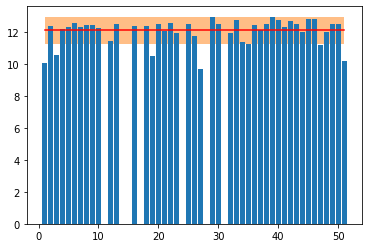

In [31]:
# plot bar plot per week
def plot_ts_bar(path):
    weeks,targets,mean,std = get_ts(path)
    import matplotlib.pyplot as plt
    plt.bar(weeks,targets)
    plt.plot(weeks,mean*np.ones(len(weeks)),'r')
    plt.fill_between(weeks,mean-std,mean+std,alpha=0.5)
    plt.show()
# test
plot_ts_bar(('ORD','DFW'))

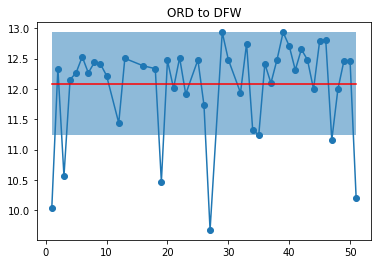

In [42]:
# plot line plot per week 
def plot_ts_line(path):
    weeks,targets,mean,std = get_ts(path)
    import matplotlib.pyplot as plt
    plt.plot(weeks,targets,'o-')
    plt.plot(weeks,mean*np.ones(len(weeks)),'r')
    plt.fill_between(weeks,mean-std,mean+std,alpha=0.5)
    # add title 
    plt.title('{} to {}'.format(*path))
    plt.show()
# test
plot_ts_line(('ORD','DFW'))

In [56]:
# plot line plot per week using  plotly
import plotly.express as px
import plotly.graph_objects as go
def plot_ts_line_plotly(path):
    weeks,targets,mean,std = get_ts(path)
    fig = px.line(x=weeks,y=targets,title='{} to {}'.format(*path))
    # add mean line
    fig.add_trace(go.Scatter(x=weeks,y=mean*np.ones(len(weeks)),name='mean'))
    fig.add_trace(go.Scatter(x=weeks,y=(mean-std)*np.ones(len(weeks)),name='mean-std',mode='lines',line=dict(color='red',dash='dash')))
    fig.add_trace(go.Scatter(x=weeks,y=(mean+std)*np.ones(len(weeks)),name='mean+std',mode='lines',line=dict(color='red',dash='dash')))

    fig.show()
# test
plot_ts_line_plotly(('ORD','DFW'))
plot_ts_line_plotly(('ORD','LAX'))



In [67]:
from  collections import Counter
# get all from,to pairs
from_to = list(data.groupby(['from','to']).count().index)
from_to_count = list(data.groupby(['from','to']).count()['target'].values)
from_to_dict = dict(zip(from_to,from_to_count))
# order by count
from_to_dict = Counter({k:v for k,v in sorted(from_to_dict.items(),key=lambda x:x[1],reverse=True)})
# get top 10
top_10 = from_to_dict.most_common(10)
for path,count in top_10:
    print(path,count)
    plot_ts_line_plotly(path)


('DTW', 'LGA') 89


('LAS', 'ORD') 85


('JFK', 'MCO') 84


('MSP', 'DEN') 84


('LAS', 'LAX') 83


('ORD', 'LAX') 83


('ORD', 'SFO') 83


('BOS', 'EWR') 81


('DEN', 'DFW') 81


('ATL', 'MCO') 80
